In [1]:
%matplotlib inline
    
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

from network_simulator import WaterNetworkSimulator

from pathlib import Path

In [2]:
inp_file = '../networks/bwcn8-168-true.inp'

# Create instance of WNS
wn_sim = WaterNetworkSimulator(inp_file)

# Get the network in a NetworkX format
graph = wn_sim.wn.get_graph()
graph

/Users/crizzo/Repos/network-simulator/.env/lib/python3.7/site-packages/wntr/epanet/io.py:2173: UserWarning: Not all curves were used in "../networks/bwcn8-168-true.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


In [3]:
# Basic plots
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
wn_sim.plot(ax, 'P8', 'P800')
ax.set_aspect('equal')

In [4]:
# Distance between 2 pipes
print('Distance between pipes:', wn_sim.distance('P8', 'P800'))

Distance between pipes: 24


In [5]:
# Read simulations output: base information
output_folder = 'temp_test'

with open(Path(output_folder) / '_base_' / 'info.json') as f:
    info_base = json.load(f)
    
print(info_base.keys())
print()
print('nodes', info_base['nodes'].keys())
for node_type in info_base['nodes']:
    print(node_type, len(info_base['nodes'][node_type]))
print()
print('links', info_base['links'].keys())
for link_type in info_base['links']:
    print(link_type, len(info_base['links'][link_type]))

dict_keys(['nodes', 'links'])

nodes dict_keys(['tanks', 'reservoirs', 'junctions'])
tanks 7
reservoirs 1
junctions 388

links dict_keys(['pipes', 'pumps', 'valves'])
pipes 429
pumps 11
valves 4


{'leak_pipes': ['P1022'], 'leak_areas': [0.0038131225529031104]}


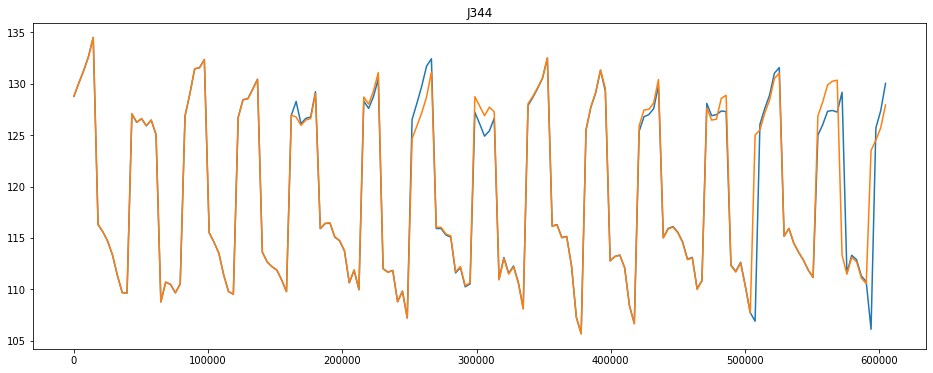

In [6]:
# Read simulation outputs
df_base_head = pd.read_csv(Path(output_folder) / '_base_' / 'node_head.csv', index_col=0)
df_sample_0_head = pd.read_csv(Path(output_folder) / '000001' / 'node_head.csv', index_col=0)

with open(Path(output_folder) / '000001' / 'info.json') as f:
    info_0_sample = json.load(f)
    print(info_0_sample)

node = 'J344'

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(df_base_head[node], color='C0')
ax.plot(df_sample_0_head[node], color='C1')
_ = ax.set_title(node)